In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#Data pre-processing

In [79]:
df = pd.read_csv('winequality-red-mod.csv')
df.head(4)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,flavonoids,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,country,quality
0,1,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,UK,5
1,2,7.8,0.88,0.00,2.6,0.754,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Italy,5
2,3,7.8,0.76,0.04,2.3,0.688,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Italy,5
3,4,11.2,0.28,0.56,1.9,0.459,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Spain,6


## Removing the rows with NaN values

Checking the rows with null values

In [80]:
pd.isnull(df).sum() > 0

id                      False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
flavonoids               True
chlorides                True
free sulfur dioxide      True
total sulfur dioxide     True
density                  True
pH                       True
sulphates                True
alcohol                  True
country                  True
quality                 False
dtype: bool

In [0]:
df = df.dropna(how='any',axis=0)

## Changing Categorical to numerical values

In [82]:
print(df.country.unique())
le = LabelEncoder()
X = df[['country']]
encoded_country = le.fit_transform(np.ravel(X))    # warning thrown without np.ravel

print("\n The result of transforming X with LabelEncoder:")
print(encoded_country)
print(type(encoded_country))
encoded_country.shape

['UK' 'Italy' 'Spain']

 The result of transforming X with LabelEncoder:
[2 0 0 ... 2 2 1]
<class 'numpy.ndarray'>


(1504,)

In [0]:
df = df.drop(['id', 'country'], axis=1)

In [84]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,flavonoids,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.754,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.688,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.459,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
df['country'] = encoded_country

In [86]:
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,flavonoids,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,country
0,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.754,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.688,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.459,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1


In [87]:
df.shape

(1504, 14)

In [0]:
df = df.dropna(how='any',axis=0)

In [89]:
df.shape

(1504, 14)

In [90]:
data_stats = df.describe()
data_stats = data_stats.transpose()
data_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1504.0,8.406981,1.757966,-1.0,7.2000,8.0000,9.3000,15.9000
volatile acidity,1504.0,0.524890,0.183892,-1.0,0.3900,0.5200,0.6350,1.5800
citric acid,1504.0,0.273910,0.198186,-1.0,0.1000,0.2600,0.4300,1.0000
residual sugar,1504.0,2.540060,1.406215,-1.0,1.9000,2.2000,2.6000,15.5000
flavonoids,1504.0,0.597992,0.252626,-1.0,0.4940,0.5590,0.6330,3.2060
chlorides,1504.0,0.087533,0.055560,-1.0,0.0710,0.0800,0.0910,0.6110
free sulfur dioxide,1504.0,15.597074,10.456825,-1.0,7.0000,13.0000,21.0000,72.0000
total sulfur dioxide,1504.0,46.764628,33.240872,-1.0,22.0000,38.0000,63.0000,289.0000
density,1504.0,0.996155,0.057661,-1.0,0.9957,0.9968,0.9979,1.9994
pH,1504.0,3.302553,0.190515,-1.0,3.2000,3.3000,3.4000,4.0100


There are no categorical variables. each feature is a number. Regression problem. 
Given the set of values for features, we have to predict the quality of wine.
finding correlation of each feature with our target variable - quality

In [91]:

correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.138583
volatile acidity       -0.377123
citric acid             0.233458
residual sugar          0.016327
flavonoids             -0.199290
chlorides              -0.085691
free sulfur dioxide    -0.049119
total sulfur dioxide   -0.185431
density                 0.045603
pH                     -0.018068
sulphates               0.253316
alcohol                 0.377449
country                -0.035904
Name: quality, dtype: float64


# Data Visualisation

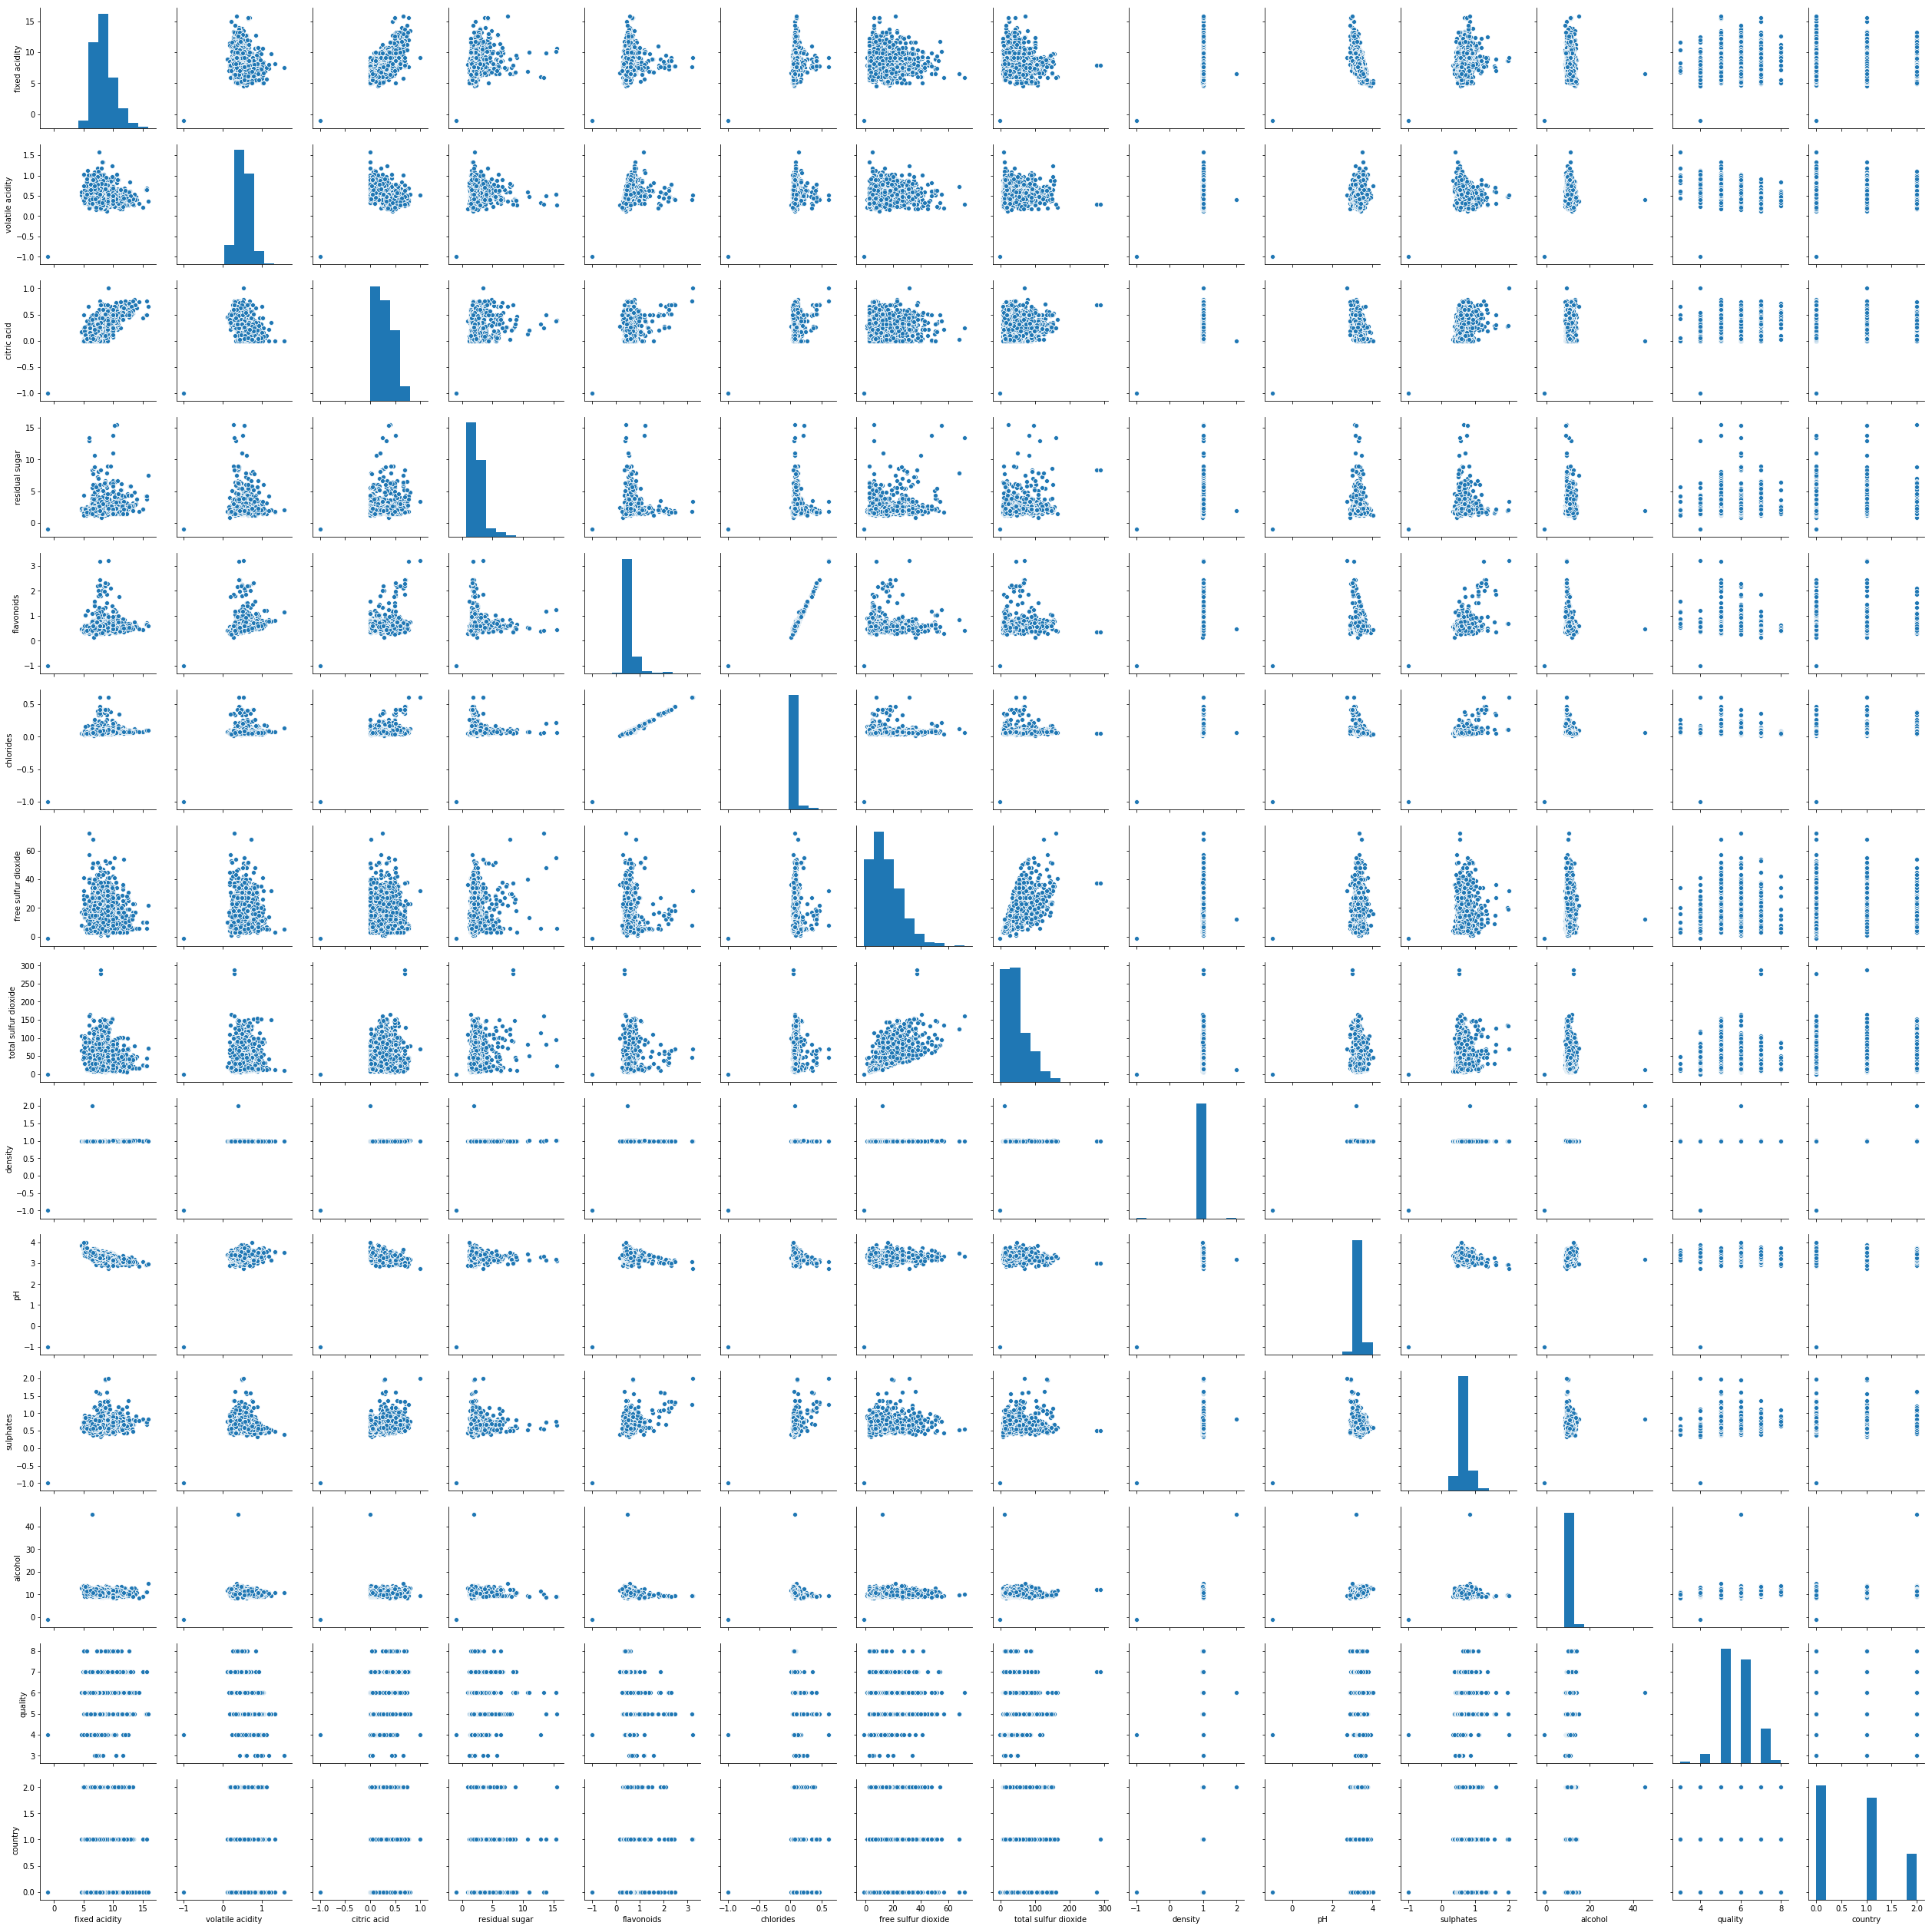

In [92]:
sns.pairplot(df)

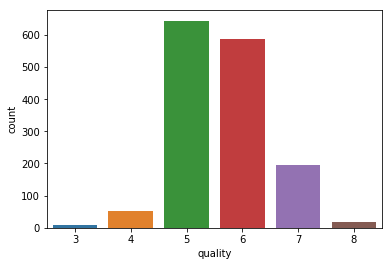

In [93]:
#count of the target variable
sns.countplot(x='quality', data=df)

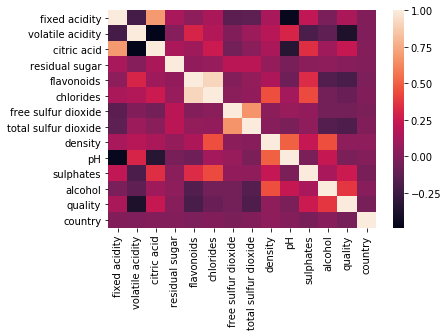

In [94]:
sns.heatmap(df.corr())
plt.show()

# Choosing features

In [0]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

Taking features with correlation more than 0.05 as input x and quality as target variable y

In [96]:
features = get_features(0.05)
print(features)
x = df[features]
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'flavonoids', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']


In [97]:
x

,fixed acidity,volatile acidity,citric acid,flavonoids,chlorides,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,0.00,0.5900,0.076,34.0,0.56,9.400000
1,7.8,0.880,0.00,0.7540,0.098,67.0,0.68,9.800000
2,7.8,0.760,0.04,0.6880,0.092,54.0,0.65,9.800000
3,11.2,0.280,0.56,0.4590,0.075,60.0,0.58,9.800000
4,7.4,0.700,0.00,0.5900,0.076,34.0,0.56,9.400000
5,7.4,0.660,0.00,0.5730,0.075,40.0,0.56,9.400000
6,7.9,0.600,0.06,0.5250,0.069,59.0,0.46,9.400000
7,7.3,0.650,0.00,0.5200,0.065,21.0,0.47,10.000000
8,7.8,0.580,0.02,0.5390,0.073,18.0,0.57,9.500000
9,7.5,0.500,0.36,0.5050,0.071,102.0,0.80,10.500000


In [98]:
y

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1476    3
1477    5
1478    5
1479    6
1480    5
1481    5
1482    7
1483    5
1484    7
1485    3
1486    5
1487    4
1488    5
1489    4
1490    5
1491    4
1492    5
1493    5
1494    5
1495    5
1496    6
1497    6
1498    5
1499    5
1500    5
1501    7
1502    6
1503    5
1504    6
1505    6
Name: quality, Length: 1504, dtype: int64

#Data Split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [100]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1128, 8)
(376, 8)
(1128,)
(376,)


In [101]:
train_stats = x_train.describe()

train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1128.0,8.454787,1.772283,4.600,7.200,8.000,9.400000,15.900
volatile acidity,1128.0,0.525767,0.176471,0.120,0.390,0.520,0.635000,1.330
citric acid,1128.0,0.279193,0.196697,0.000,0.100,0.270,0.440000,1.000
flavonoids,1128.0,0.603147,0.258121,0.144,0.494,0.561,0.635000,3.206
chlorides,1128.0,0.089083,0.049871,0.012,0.071,0.080,0.091000,0.611
total sulfur dioxide,1128.0,46.825355,32.348399,6.000,22.000,38.000,64.000000,160.000
sulphates,1128.0,0.659388,0.173826,0.370,0.550,0.620,0.730000,2.000
alcohol,1128.0,10.398596,1.070675,8.400,9.500,10.100,11.016667,14.900


In [102]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
# this gives the coefficients of the 10 features selected above. 
regressor.coef_

array([ 0.02721629, -1.12314408, -0.20823168, -0.32596291,  0.00219606,
       -0.00293737,  0.81276048,  0.28960545])

In [104]:
train_pred = regressor.predict(x_train)
train_pred

array([4.55914289, 5.58413779, 5.05971056, ..., 6.26322593, 6.72917669,
       6.78587992])

In [0]:
test_pred = regressor.predict(x_test)

#Root Mean Square error(RMSE)

The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed. 
The RMSE for your training and your test sets should be very similar if you have built a good model. 
If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data

In [106]:
train_rmse = metrics.mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.672389192220135

In [107]:
test_rmse = metrics.mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

0.7899416615704954

#Accuracy

## Linear Regression Accuracy

In [108]:
lr_acc_score = metrics.accuracy_score(y_test, test_pred.round())
print(lr_acc_score*100)

63.297872340425535


## Logistic Regression Accuracy

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

lr_acc_score = metrics.accuracy_score(y_test, lr_predict.round())
print(lr_acc_score*100)

57.446808510638306


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


By Comparing Linear and Logistic Regression, we get the accuracy error of Linear Regression. So, we will choose that model.

In [110]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.4888026382377103
Mean Squared Error: 0.6240078286847551
Root Mean Squared Error: 0.7899416615704954


# Coefficientds

These numbers mean that holding all other features fixed, a 1 unit increase in suplhates will lead to an increase of 0.8 in Quality of wine, and similarly for the other features
These numbers mean that holding all other features fixed, a 1 unit increase in volatile acidity will lead to a decrease of 0.99 in Quality of wine, and similarly for the other features

In [111]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
fixed acidity,0.027216
volatile acidity,-1.123144
citric acid,-0.208232
flavonoids,-0.325963
chlorides,0.002196
total sulfur dioxide,-0.002937
sulphates,0.812760
alcohol,0.289605


# Save all in files

In [112]:
x_train.to_csv('x_train_data.csv',index=None)
x_test.to_csv('x_test_data.csv',index=None)
y_train.to_csv('y_train_data.csv',index=None)
y_test.to_csv('y_test_data.csv',index=None)
predicted_test = np.round_(test_pred)
pd.DataFrame(predicted_test, columns=['predictions']).to_csv('prediction_test.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
